In [1]:
import pandas as pd
import geopandas
from sklearn.cluster import OPTICS 
import matplotlib.pyplot as plt
import seaborn as sns
import osmnx as ox
import geopandas as gpd
import numpy as np

In [2]:
headers = ['userid', 'timecome','date','lat','long','count','timeleave','duration']
stay_07 = pd.read_csv('../../data/stay_points_07/2017-07-02.txt', names=headers)

In [3]:
stay_07_loc = stay_07[['lat', 'long']]
points = stay_07_loc.to_numpy()
points_a = points[0:1000]

In [4]:
optics = OPTICS(min_samples=10, max_eps=0.005)
predictor = optics.fit(points_a)

In [5]:
test = pd.DataFrame(optics.labels_)
# Extract reachable cluster labels
clusters = predictor.labels_[optics.labels_ != -1]

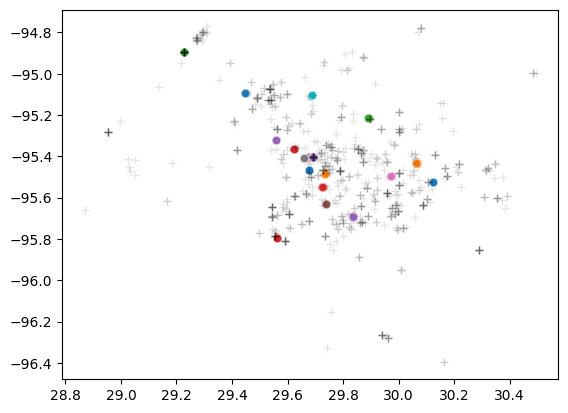

In [6]:
for kluster in clusters:
    Xk = points_a[optics.labels_ == kluster]
    sns.scatterplot(x=Xk[:,0], y=Xk[:,1], alpha=0.3)
plt.plot(points_a[optics.labels_ == -1, 0], points_a[optics.labels_ == -1, 1], "k+", alpha=0.1)

<Axes: >

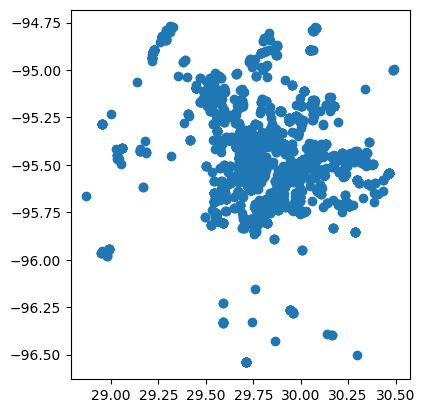

In [7]:
geo_stay_07 = geopandas.GeoDataFrame(
    stay_07_loc, 
    geometry=geopandas.points_from_xy(stay_07_loc.lat, stay_07_loc.long), 
    crs="EPSG:4326")
geo_stay_07[0:2000].plot(aspect=1)